Trisomy

In [2]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

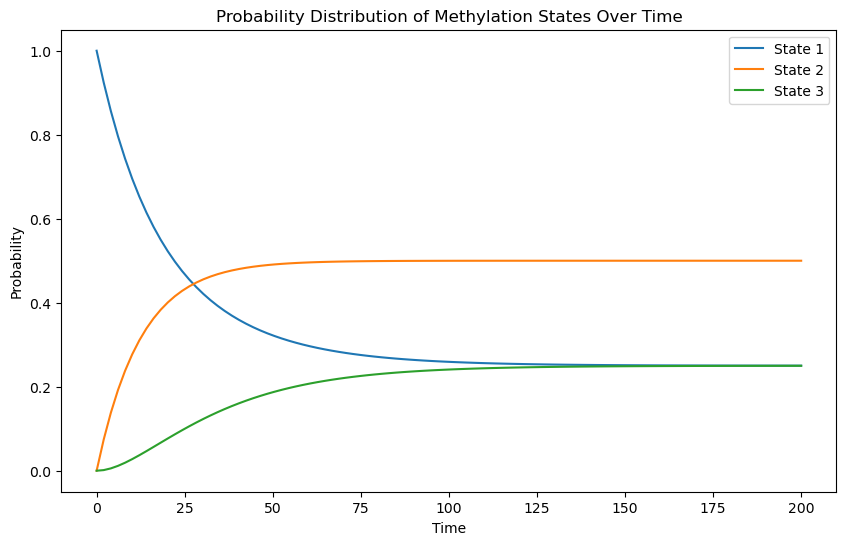

In [60]:
initial_state = np.array([1, 0, 0])  
mu = 0.02                          
gamma = 0.02                 
time_points = np.linspace(0, 200, 100)  

RateMatrix = np.array([[-2*gamma, mu, 0], 
                            [2*gamma, -(gamma + mu), 2*mu], 
                            [0, gamma, -2*mu]])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates) 

plt.figure(figsize=(10, 6))
for state in range(3):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()


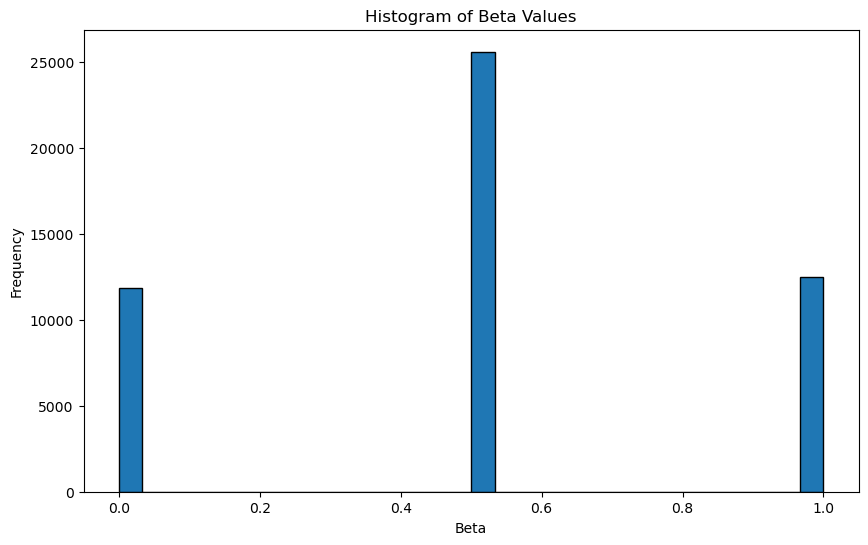

In [63]:
def state_simulation(initial_state, mu, gamma):
    rng = np.random.default_rng()
    m,k,w = initial_state
    dt=1

    p_m_to_k = 2 * gamma * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_w = mu * dt if k == 1 else 0      
    p_w_to_k = 2 * mu * dt if w == 1 else 0    

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, w = 0, 1, 0  

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, w = 1, 0, 0  
            
        elif rng.random() < p_k_to_w:
            m, k, w = 0, 0, 1  

    elif w == 1:
        if rng.random() < p_w_to_k:
            m, k, w = 0, 1, 0  

    return [m, k, w]

x = []

def run_simulation(initial_state, mu, gamma, num_iterations=50000):
    current_state = initial_state
    for _ in range(num_iterations):
        current_state = state_simulation(current_state, mu, gamma)  
        x.append(current_state)  

    return x

mu = 0.02
gamma = 0.02
initial_state = [1, 0, 0]  

final_states = run_simulation(initial_state, mu, gamma)


m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

w_list = []
w_vals = [subarray[2] for subarray in x]
w_list.append([])


beta_vals = [(k + 2*m) / 2 for m, k in zip(m_vals, k_vals)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()


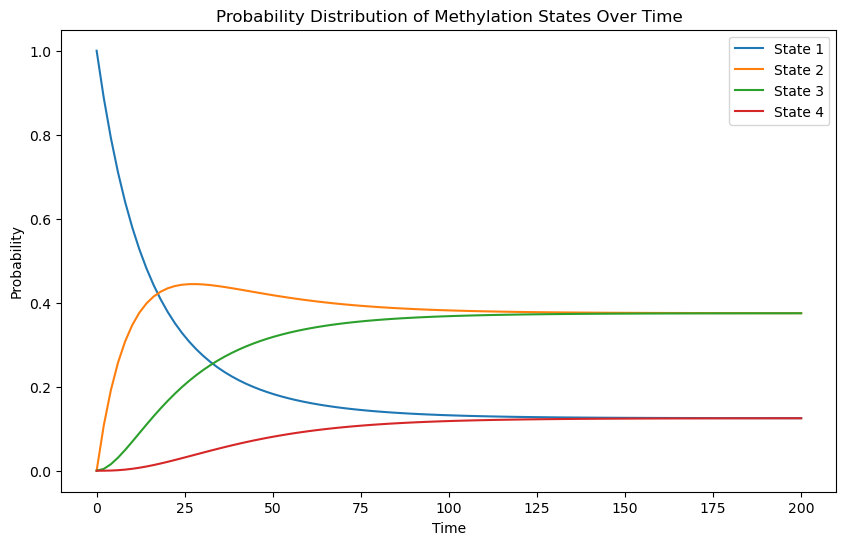

In [59]:
initial_state = np.array([1, 0, 0, 0])  
mu = 0.02                          
gamma = 0.02                 
time_points = np.linspace(0, 200, 100)  


RateMatrix = np.array([[-3*mu, gamma, 0, 0], 
                            [3*mu, -(gamma+2*mu), 2*gamma, 0], 
                            [0, 2*mu, -(2*gamma+mu), 3*gamma],
                            [0, 0, mu, -3*gamma]])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates) 

plt.figure(figsize=(10, 6))
for state in range(4):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()


Tetraploidy

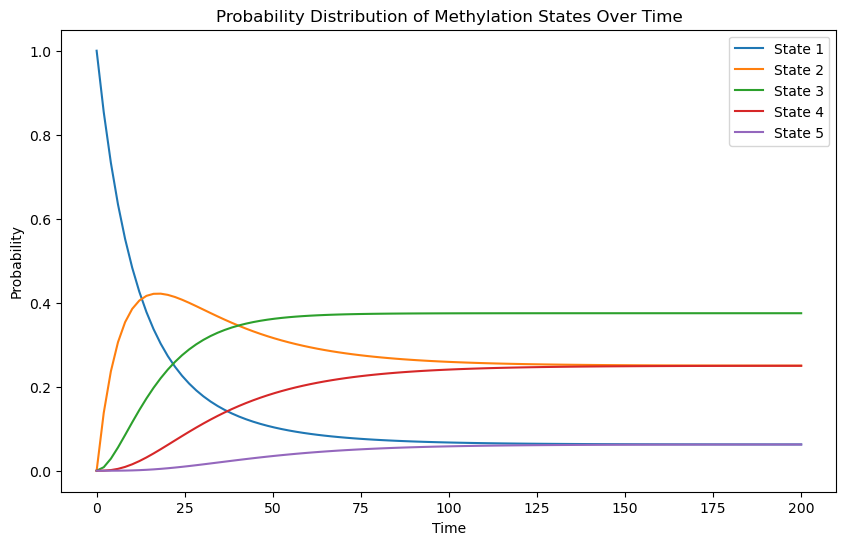

In [52]:
initial_state = np.array([1, 0, 0, 0, 0])  
mu = 0.02             #methylation rate            
gamma = 0.02          #demethylation rate 
time_points = np.linspace(0, 200, 100)   


RateMatrix = np.array([
    [-4*mu, gamma, 0, 0, 0],                
    [4*mu, -(3 * mu + gamma), 2 * gamma, 0, 0], 
    [0, 3 * mu, -(2 * mu + 2*gamma), 3*gamma, 0], 
    [0, 0, 2*mu, -(3*gamma+mu), 4*gamma],
    [0, 0, 0, mu, -4*gamma]           
])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates) 

plt.figure(figsize=(10, 6))
for state in range(5):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()

Trisomy State simulationn

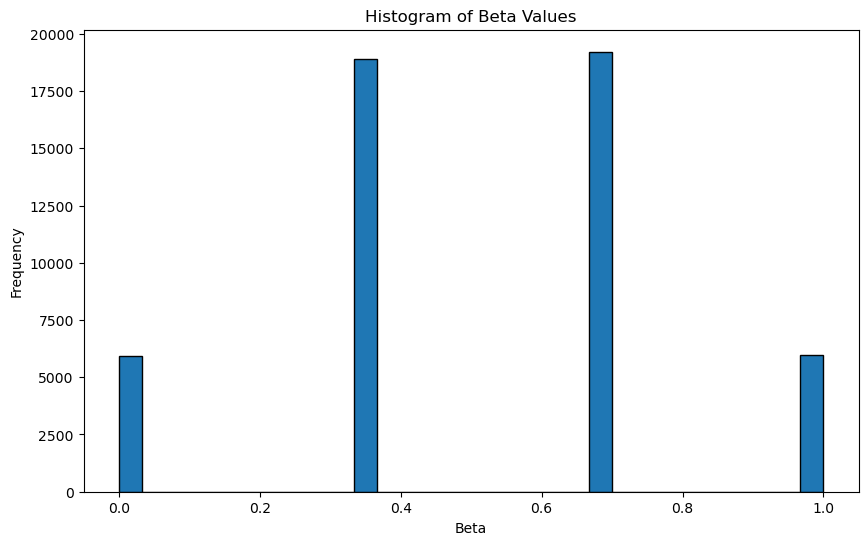

In [55]:
def state_simulation(initial_state, mu, gamma):
    rng = np.random.default_rng()
    m,k,d,w = initial_state
    dt=1

    p_m_to_k = 3*mu * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_d = 2*mu * dt if k == 1 else 0      
    p_d_to_k = 2*gamma * dt if d == 1 else 0    
    p_d_to_w = mu * dt if d == 1 else 0      
    p_w_to_d = 3*gamma * dt if w == 1 else 0    

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, d, w = 0, 1, 0, 0 

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, d, w = 1, 0, 0, 0
            
        elif rng.random() < p_k_to_d:
            m, k, d, w = 0, 0, 1, 0

    elif d == 1:
        if rng.random() < p_d_to_k:
            m, k, d, w = 0, 1, 0, 0
            
        elif rng.random() < p_d_to_w:
            m, k, d, w = 0, 0, 0, 1

    elif w == 1:
        if rng.random() < p_w_to_d:
            m, k, d, w = 0, 0, 1, 0

    return [m, k, d, w]

x = []

def run_simulation(initial_state, mu, gamma, num_iterations=50000):
    current_state = initial_state
    for _ in range(num_iterations):
        current_state = state_simulation(current_state, mu, gamma)  
        x.append(current_state)  

    return x

mu = 0.02
gamma = 0.02
initial_state = [1, 0, 0, 0]  

final_states = run_simulation(initial_state, mu, gamma)

m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

d_list = []
d_vals = [subarray[2] for subarray in x]
d_list.append([])

w_list = []
w_vals = [subarray[3] for subarray in x]
w_list.append([])


beta_vals = [(k + 2 * d + 3 * w) / 3 for k, d, w in zip(k_vals, d_vals, w_vals)]

plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()

I think i need to modify this so that once the simulation has been run the the new state is saved and then input into the state simulation function as right now I think it is just repeating the transition from state m to state k

Tetraploidy state simulation

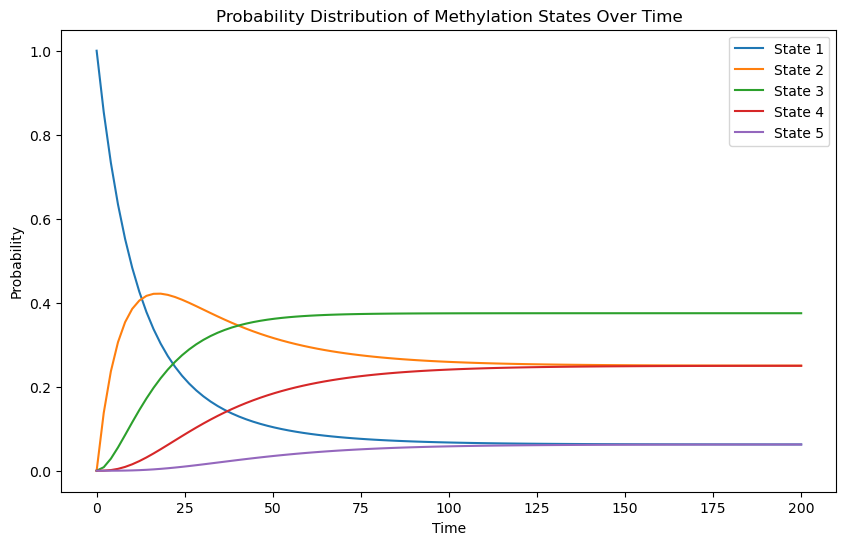

In [61]:
initial_state = np.array([1, 0, 0, 0, 0])  
mu = 0.02             #methylation rate            
gamma = 0.02          #demethylation rate 
time_points = np.linspace(0, 200, 100)   


RateMatrix = np.array([
    [-4*mu, gamma, 0, 0, 0],                
    [4*mu, -(3 * mu + gamma), 2 * gamma, 0, 0], 
    [0, 3 * mu, -(2 * mu + 2*gamma), 3*gamma, 0], 
    [0, 0, 2*mu, -(3*gamma+mu), 4*gamma],
    [0, 0, 0, mu, -4*gamma]           
])

Probabilities = np.zeros((len(time_points), len(initial_state)))
for i, t in enumerate(time_points):
    ProbStates = linalg.expm(RateMatrix * t) @ initial_state
    Probabilities[i] = ProbStates / np.sum(ProbStates) 

plt.figure(figsize=(10, 6))
for state in range(5):
    plt.plot(time_points, Probabilities[:, state], label=f'State {state + 1}')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability Distribution of Methylation States Over Time')
plt.legend()
plt.show()

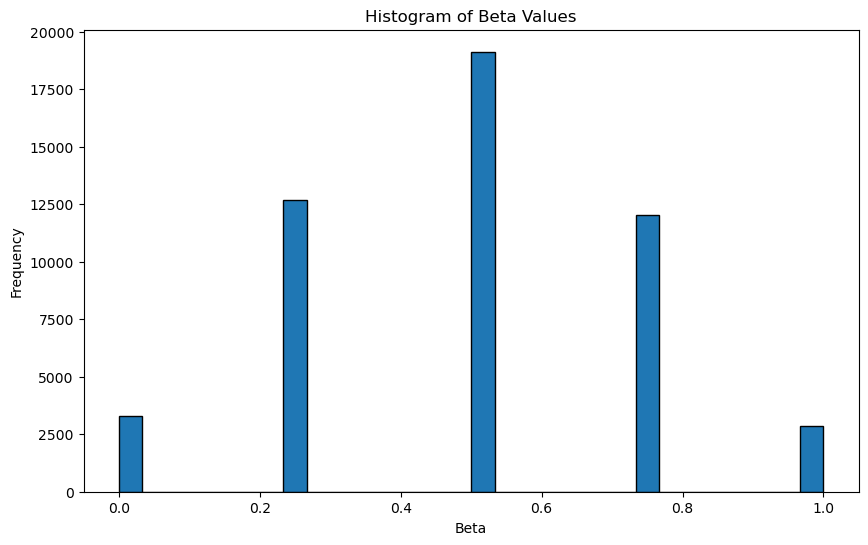

In [62]:
def state_simulation(initial_state, mu, gamma):
    rng = np.random.default_rng()
    m, k, d, v, w = initial_state
    dt=1
    p_m_to_k = 4*mu * dt if m == 1 else 0  
    p_k_to_m = gamma * dt if k == 1 else 0         
    p_k_to_d = 3*mu * dt if k == 1 else 0      
    p_d_to_k = 2*gamma * dt if d == 1 else 0    
    p_d_to_v = 2*mu * dt if d == 1 else 0      
    p_v_to_d = 3*gamma * dt if v == 1 else 0    
    p_v_to_w = mu * dt if v == 1 else 0      
    p_w_to_v = 4*gamma * dt if w == 1 else 0      

    if m == 1:
        if rng.random() < p_m_to_k:
            m, k, d, v, w = 0, 1, 0, 0, 0

    elif k == 1:
        if rng.random() < p_k_to_m:
            m, k, d, v, w = 1, 0, 0, 0, 0
            
        elif rng.random() < p_k_to_d:
            m, k, d, v, w = 0, 0, 1, 0, 0

    elif d == 1:
        if rng.random() < p_d_to_k:
            m, k, d, v, w = 0, 1, 0, 0, 0
            
        elif rng.random() < p_d_to_v:
            m, k, d, v, w = 0, 0, 0, 1, 0
    
    elif v == 1:
        if rng.random() < p_v_to_d:
            m, k, d, v, w = 0, 0, 1, 0, 0
            
        elif rng.random() < p_v_to_w:
            m, k, d, v, w = 0, 0, 0, 0, 1

    elif w == 1:
        if rng.random() < p_w_to_v:
            m, k, d, v, w = 0, 0, 0, 1, 0

    return [m, k, d, v, w]

x = []

def run_simulation(initial_state, mu, gamma, num_iterations=50000):
    current_state = initial_state
    for _ in range(num_iterations):
        current_state = state_simulation(current_state, mu, gamma)  
        x.append(current_state) 

    return x

mu = 0.02
gamma = 0.02
initial_state = [0, 0, 0, 1, 0] 

final_states = run_simulation(initial_state, mu, gamma)

m_list = []
m_vals = [subarray[0] for subarray in x]
m_list.append([])

k_list = []
k_vals = [subarray[1] for subarray in x]
k_list.append([])

d_list = []
d_vals = [subarray[2] for subarray in x]
d_list.append([])

v_list = []
v_vals = [subarray[3] for subarray in x]
v_list.append([])

w_list = []
w_vals = [subarray[4] for subarray in x]
w_list.append([])


beta_vals = [(k + 2 * d + 3 * v + 4 * w) / 4 for k, d, v, w in zip(k_vals, d_vals, v_vals, w_vals)]

plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()

play with parameteres
look at the histogram distributions it at different stages of time - eg if LOH happens really early it looks like this and if it happens late it  looks like theis 



so data looks one way so inference looks like other way

Steps
1 initalise - at t=0 it looks like eg: prob of being in m or w is 0.5 and prob of being in k is 0
or at t=0 can say at steady state for diploid {1,2,1} berlouinn triangle
2 Evolve diploid,t1

3 Encoding a CNA event 

4 Evolve accorting to number of allels

done 2,4 but not 1,3


look at starting conditions 

wont intialise it to k as the hetrozygous state is unphysical to start of with (innfant crypt data)

try 2 initialisations and see which one makes more sense - diploid statddy state{1/4,1/2,1/4}

rate of switching is high in initial developbment ear birth then it fades of to steady state

end goal
3x2 plot of LOH, trisomy and tetraploidy against early CNA event vs late CNA event



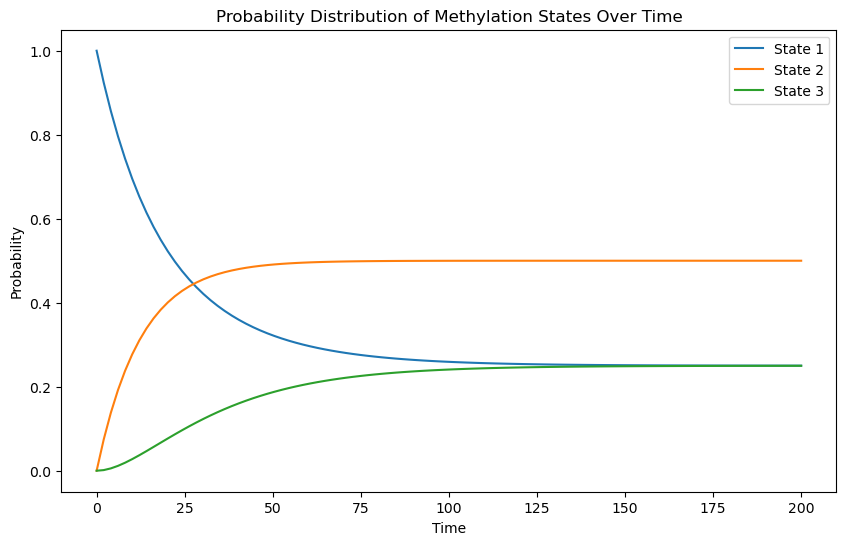

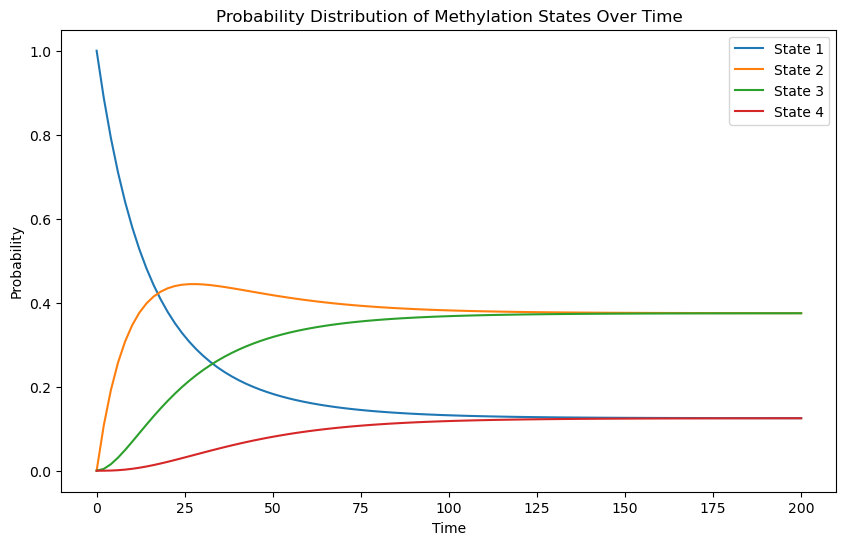

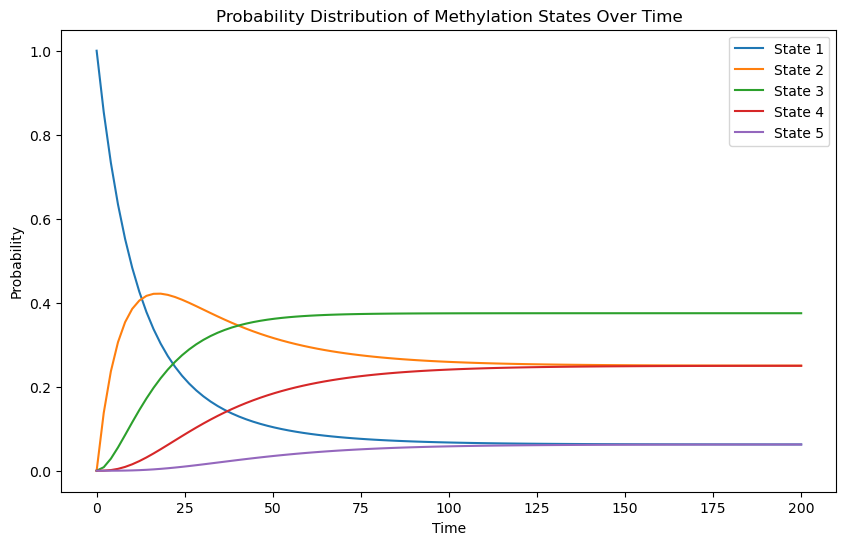

ValueError: shapes (50000,5) and (4,) not aligned: 5 (dim 1) != 4 (dim 0)

In [1]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# Initial parameters
mu = 0.02
gamma = 0.02
time_points = np.linspace(0, 200, 100)

# Function to calculate probability distribution over time for a given rate matrix
def calculate_probabilities(initial_state, rate_matrix, time_points):
    return np.array([linalg.expm(rate_matrix * t) @ initial_state / np.sum(initial_state) 
                     for t in time_points])

# Function to plot probabilities
def plot_probabilities(time_points, probabilities, num_states):
    plt.figure(figsize=(10, 6))
    for state in range(num_states):
        plt.plot(time_points, probabilities[:, state], label=f'State {state + 1}')
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.title('Probability Distribution of Methylation States Over Time')
    plt.legend()
    plt.show()

# Transition rate matrices and initial states for different cases
states_data = [
    (np.array([1, 0, 0]), np.array([[-2*gamma, mu, 0], [2*gamma, -(gamma + mu), 2*mu], [0, gamma, -2*mu]])),
    (np.array([1, 0, 0, 0]), np.array([[-3*mu, gamma, 0, 0], [3*mu, -(gamma+2*mu), 2*gamma, 0], 
                                       [0, 2*mu, -(2*gamma+mu), 3*gamma], [0, 0, mu, -3*gamma]])),
    (np.array([1, 0, 0, 0, 0]), np.array([[-4*mu, gamma, 0, 0, 0], [4*mu, -(3*mu + gamma), 2*gamma, 0, 0], 
                                          [0, 3*mu, -(2*mu + 2*gamma), 3*gamma, 0], 
                                          [0, 0, 2*mu, -(3*gamma + mu), 4*gamma], [0, 0, 0, mu, -4*gamma]]))
]

# Plot probability distributions for each state configuration
for initial_state, rate_matrix in states_data:
    probabilities = calculate_probabilities(initial_state, rate_matrix, time_points)
    plot_probabilities(time_points, probabilities, len(initial_state))

# Simulation function for state transitions
def state_simulation(initial_state, mu, gamma, num_iterations=50000):
    rng = np.random.default_rng()
    states = np.zeros((num_iterations, len(initial_state)), dtype=int)
    states[0] = initial_state
    for i in range(1, num_iterations):
        m, k, d, v, w = states[i - 1]
        # Define probabilities
        transitions = [
            (m == 1, 4 * mu, [0, 1, 0, 0, 0]),
            (k == 1, gamma, [1, 0, 0, 0, 0]),
            (k == 1, 3 * mu, [0, 0, 1, 0, 0]),
            (d == 1, 2 * gamma, [0, 1, 0, 0, 0]),
            (d == 1, 2 * mu, [0, 0, 0, 1, 0]),
            (v == 1, 3 * gamma, [0, 0, 1, 0, 0]),
            (v == 1, mu, [0, 0, 0, 0, 1]),
            (w == 1, 4 * gamma, [0, 0, 0, 1, 0])
        ]
        
        states[i] = states[i - 1]  # Start with the previous state
        for condition, rate, new_state in transitions:
            if condition and rng.random() < rate:
                states[i] = new_state
                break

    return states

# Running simulation and plotting beta distribution for the 5-state case
initial_state = [1, 0, 0, 0, 0]
simulated_states = state_simulation(initial_state, mu, gamma)

# Calculate and plot histogram of beta values
beta_vals = np.dot(simulated_states, np.array([1, 2, 3, 4]) / 4)
plt.figure(figsize=(10, 6))
plt.hist(beta_vals, bins=30, edgecolor='black')
plt.title('Histogram of Beta Values')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.show()


In [1]:
def state_initialisation():
    rng = np.random.default_rng()
    m = [1,0,0]
    k = [0,1,0]
    w = [0,0,1]

    if rng.random() < 0.5:
        initial_state = m
    else:
        initial_state = w
    
    return initial_state
